In [1]:
import pandas as pd
import numpy as np
import plotly
import json
import sqlite3
import sklearn
import random
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib import rcParams
import tensorflow as tf
import seaborn as sns
import kaggle
import locale
from kaggle.api.kaggle_api_extended import KaggleApi
%matplotlib inline

In [2]:
api = KaggleApi() # We are using the Kaggle API to load our data. Calls API Token placed in my system's directory
api.authenticate()
api.dataset_download_file('kumarajarshi/life-expectancy-who', file_name='Life Expectancy Data.csv')

False

In [3]:
# Helper method to create list of tuples
def to_tuple(data):
    return [tuple(i for i in row.values()) for row in data]

life_expec_df = pd.read_csv('Life_Expectancy_Data.csv')
life_expec_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
columns = list(life_expec_df.columns)
lst_of_dicts = [life_expec_df.loc[i].to_json() for i in life_expec_df.index] # Gives us a list of dicts of all the values in our dataframe
parsable_data = [json.loads(i) for i in lst_of_dicts]
tupled_data = to_tuple(parsable_data) # allows us to pass data into sqlite3 local database
tupled_data

[('Afghanistan',
  2015,
  'Developing',
  65.0,
  263.0,
  62,
  0.01,
  71.27962362,
  65.0,
  1154,
  19.1,
  83,
  6.0,
  8.16,
  65.0,
  0.1,
  584.25921,
  33736494.0,
  17.2,
  17.3,
  0.479,
  10.1),
 ('Afghanistan',
  2014,
  'Developing',
  59.9,
  271.0,
  64,
  0.01,
  73.52358168,
  62.0,
  492,
  18.6,
  86,
  58.0,
  8.18,
  62.0,
  0.1,
  612.696514,
  327582.0,
  17.5,
  17.5,
  0.476,
  10.0),
 ('Afghanistan',
  2013,
  'Developing',
  59.9,
  268.0,
  66,
  0.01,
  73.21924272,
  64.0,
  430,
  18.1,
  89,
  62.0,
  8.13,
  64.0,
  0.1,
  631.744976,
  31731688.0,
  17.7,
  17.7,
  0.47,
  9.9),
 ('Afghanistan',
  2012,
  'Developing',
  59.5,
  272.0,
  69,
  0.01,
  78.1842153,
  67.0,
  2787,
  17.6,
  93,
  67.0,
  8.52,
  67.0,
  0.1,
  669.959,
  3696958.0,
  17.9,
  18.0,
  0.463,
  9.8),
 ('Afghanistan',
  2011,
  'Developing',
  59.2,
  275.0,
  71,
  0.01,
  7.097108703,
  68.0,
  3013,
  17.2,
  97,
  68.0,
  7.87,
  68.0,
  0.1,
  63.537231,
  2978599.0,


In [5]:
connector = sqlite3.connect('Human_Life_Expectancy.db') # creating the database
cursor = connector.cursor()

In [6]:
# Creating the raw data - Run cell once during db creation
create_raw = '''CREATE TABLE IF NOT EXISTS raw_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    raw TEXT
)'''

cursor.execute(create_raw) 

In [ ]:
create_expectancy = '''CREATE TABLE IF NOT EXISTS expectancy (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT,
    year TEXT,
    status TEXT,
    life_expectancy TEXT,
    adult_mortality TEXT,
    infant_deaths TEXT,
    alcohol TEXT,
    percentage_expendature TEXT,
    hepatitis_b TEXT,
    measels TEXT,
    bmi TEXT,
    under_five_deaths TEXT,
    polio TEXT,
    total_expendature TEXT,
    diphtheria TEXT,
    hiv_aids TEXT,
    gdp TEXT,
    population TEXT,
    thinness_1_19_years TEXT,
    thinness_5_9_years TEXT,
    income_composition_of_resources TEXT,
    schooling TEXT
    );
'''

cursor.execute(create_expectancy)
connector.commit()

In [ ]:
str1 = ''
for i in list(life_expec_df.columns):
    str1 += i + ', '
print(len(list(life_expec_df.columns)))
str1 # Making string of columns names because I am too lazy to type it all out

In [ ]:
# Inserting raw data to database
cursor.executemany('''INSERT INTO expectancy (
    country,
    year,
    status,
    life_expectancy,
    adult_mortality,
    infant_deaths,
    alcohol,
    percentage_expendature,
    hepatitis_b,
    measels,
    bmi,
    under_five_deaths,
    polio,
    total_expendature,
    diphtheria,
    hiv_aids,
    gdp,
    population,
    thinness_1_19_years,
    thinness_5_9_years,
    income_composition_of_resources,
    schooling)
    VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tupled_data)
connector.commit()
connector.close()

In [7]:
def select_column(column_name): # Grabbing columns we need from df, first 4 columns will auto add into data
    connector = sqlite3.connect('Human_Life_Expectancy.db')
    cursor = connector.cursor()
    query = cursor.execute(f'''SELECT {column_name} FROM expectancy;''')
    exempt_col = ['Country', 'Year', 'Status']
    if column_name.title() in exempt_col: raise AttributeError('Columns have no numerical values.') # These columns have no numerical values
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # We can set the locale to transform string values to UTF-8 type floats
    return [locale.atof(i[0]) if i[0] != 'Not Available' else i[0] for i in query] # use i[0] because i is a tuple, may be some Not Available 

In [8]:
def select_countries(*countries):
    for i in countries:
        if i not in list(life_expec_df.Country.values): raise AttributeError('Country not in database')
    connector = sqlite3.connect('Human_Life_Expectancy.db')
    cursor = connector.cursor()
    query = [cursor.execute('SELECT * FROM expectancy WHERE country=:x', {'x':country}).fetchall() for country in countries] # this gives us a 2D list, we need 1D
    connector.close()
    return [j for i in query for j in i] # Gives us a 1D list

columns = list(life_expec_df.columns)
columns = ['id'] + columns # creating an index
columns = [i.strip() for i in columns]
columns = [i.replace(' ', '_') for i in columns]
columns = [i.replace('-', '_') for i in columns]
columns = [i.replace('/', '_') for i in columns]
columns = [i.lower() for i in columns]

# Country names are stored in countries.txt
countries = pd.DataFrame(select_countries('Norway', 'Egypt', 'France', 'United States of America', 'United Kingdom of Great Britain and Northern Ireland'), columns=columns)

In [9]:
def select_status(status):
    if status not in list(life_expec_df.Status.values): raise ValueError('Please enter a proper status value (Developed / Developing)')
    connector = sqlite3.connect('Human_Life_Expectancy.db')
    cursor = connector.cursor()
    query = [i for i in cursor.execute('SELECT * FROM expectancy WHERE status=:x', {'x':status})]
    return query

developing_countries = pd.DataFrame(select_status('Developing'), columns=columns)
developed_countries = pd.DataFrame(select_status('Developed'), columns=columns)
developing_countries.fillna(np.nan, inplace=True)
developed_countries.fillna(np.nan, inplace=True)

In [10]:
developed_countries.head()
developed_countries.isna().sum()

id                                   0
country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                             28
percentage_expenditure               0
hepatitis_b                        173
measles                              0
bmi                                  0
under_five_deaths                    0
polio                                0
total_expenditure                   32
diphtheria                           0
hiv_aids                             0
gdp                                 64
population                          96
thinness__1_19_years                 0
thinness_5_9_years                   0
income_composition_of_resources     48
schooling                           48
dtype: int64

In [11]:
developing_countries.head()
developing_countries.isna().sum()

id                                   0
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            166
percentage_expenditure               0
hepatitis_b                        380
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  194
diphtheria                          19
hiv_aids                             0
gdp                                384
population                         556
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    119
schooling                          115
dtype: int64

In [ ]:
color_palette = [ # Some colors supported by Pandas, we will random shuffle the colors for fun
    'lightcoral', 'brown', 'firebrick', 'marron', 'red', 'salmon', 
    'bisque', 'darkorange', 'b', 'r', 'g', 'c', 
    'm', 'y', 'k', 'tan', 'navajowhite', 'orange', 
    'moccasin', 'gold', 'khaki', 'darkkhaki', 'olive', 'olivedrab',
    'forestgreen', 'lime', 'limegreen', 'springgreen', 'mediumaquagreen', 'aquamarine',
    'turquoise', 'paleturquoise', 'darkslategrey', 'darkcyan', 'cyan', 'cadetblue',
    'powderblue', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'lavender', 'midnightblue',
    'navy', 'slateblue', 'darkslateblue', 'mediumpurple', 'rebeccapurple', 'darkorchid', 
    'indigo', 'mediumorchid', 'thistle', 'plum', 'darkmagenta', 'fuchsia', 'pink'
    ]

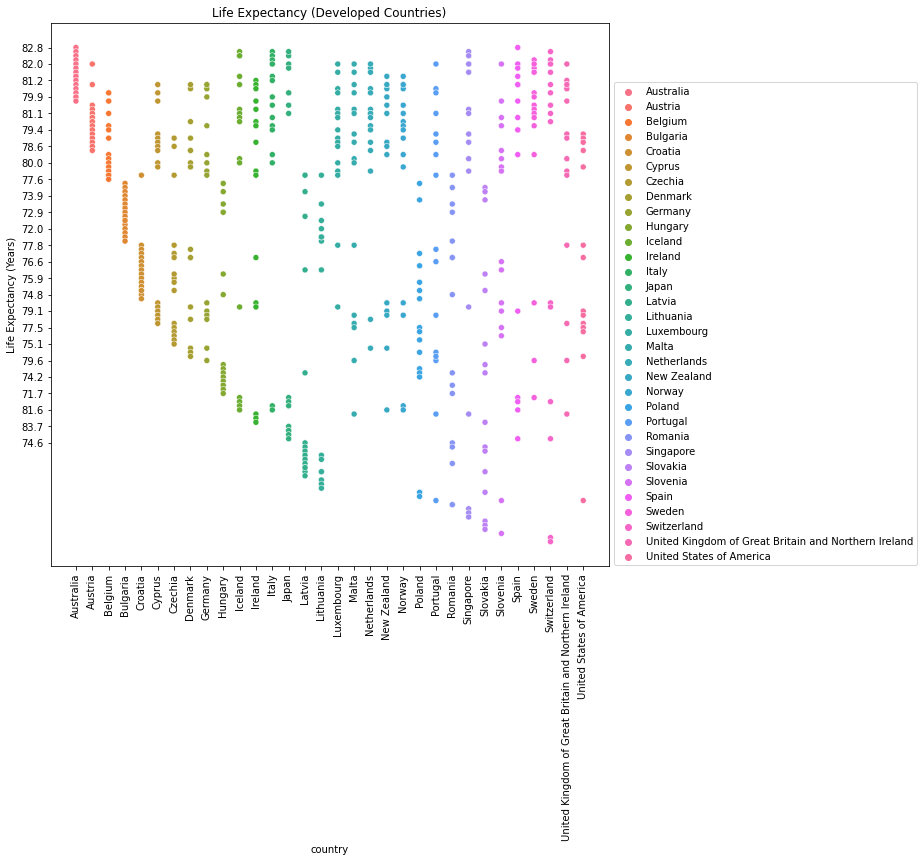

In [12]:
# Let's plot developed life expectancy

rcParams['figure.figsize'] = 10,10
ax1 = sns.scatterplot(data=developed_countries, x=developed_countries.country, y=developed_countries.life_expectancy, hue=developed_countries.country)
ax1.set(ylabel='')
plt.xticks(rotation=90)
plt.yticks([i for i in range(0, 100, 4)])
plt.legend(bbox_to_anchor=(1,0.9))
plt.title('Life Expectancy (Developed Countries)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

C:\Users\daiya\AppData\Local\Temp\ipykernel_26052\2185462238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.life_expectancy, df.year = pd.to_numeric(df.life_expectancy), pd.to_numeric(df.year)
C:\Users\daiya\AppData\Local\Temp\ipykernel_26052\2185462238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.life_expectancy, df.year = pd.to_numeric(df.life_expectancy), pd.to_numeric(df.year)
C:\Users\daiya\AppData\Local\Temp\ipykernel_26052\2185462238.py:4: SettingWithCopyWarning: 
A value is trying 

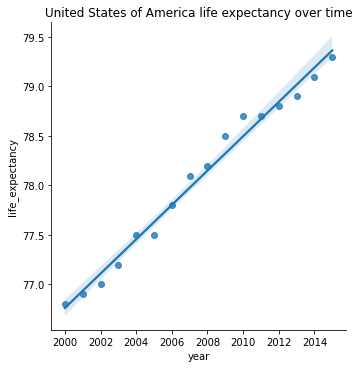

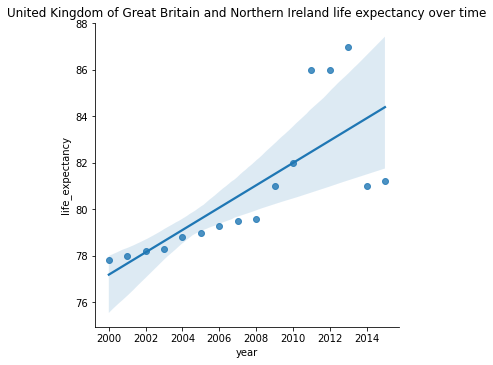

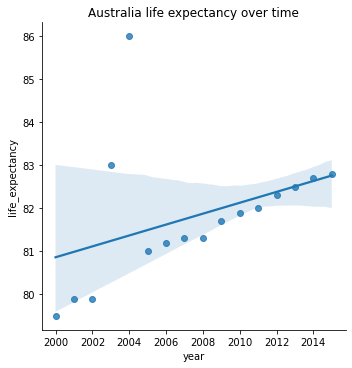

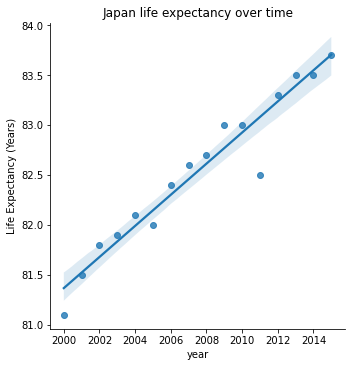

In [20]:
# Let's do regression over n number of countries (life expectancy over time)
def set_dataframe(country):
    df = developed_countries[developed_countries.country == country]
    df.life_expectancy, df.year = pd.to_numeric(df.life_expectancy), pd.to_numeric(df.year)
    return df


four_countries = ['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Australia', 'Japan'] # Change countries here

country1 = set_dataframe(four_countries[0])
country1_regplot = sns.lmplot(x='year', y='life_expectancy', data=country1).set(title=f'{four_countries[0]} life expectancy over time') # creating a linear regression plot using sns

country2 = set_dataframe(four_countries[1]) 
country2 = sns.lmplot(x='year', y='life_expectancy', data=country2).set(title=f'{four_countries[1]} life expectancy over time')

country3 = set_dataframe(four_countries[2]) 
country3 = sns.lmplot(x='year', y='life_expectancy', data=country3).set(title=f'{four_countries[2]} life expectancy over time')

country4 = set_dataframe(four_countries[3]) 
country4 = sns.lmplot(x='year', y='life_expectancy', data=country4).set(title=f'{four_countries[3]} life expectancy over time')

plt.ylabel('Life Expectancy (Years)')
plt.show()